In [ ]:
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import matplotlib.pyplot as plt
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras_preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
#train_dir="../input/face_recognition_dataset/Original_Images/Original_Images/"
train_dir="/home/meatisdelicious/DetectionVisage/DetectionVisage/FaceDetectionV4/input/face_recognition_dataset/Original_Images/Original_Images/"

generator = ImageDataGenerator()
train_ds = generator.flow_from_directory(train_dir,target_size=(224, 224),batch_size=32)
classes = list(train_ds.class_indices.keys())

Found 2562 images belonging to 31 classes.
['Akshay Kumar', 'Alexandra Daddario', 'Alia Bhatt', 'Amitabh Bachchan', 'Andy Samberg', 'Anushka Sharma', 'Billie Eilish', 'Brad Pitt', 'Camila Cabello', 'Charlize Theron', 'Claire Holt', 'Courtney Cox', 'Dwayne Johnson', 'Elizabeth Olsen', 'Ellen Degeneres', 'Henry Cavill', 'Hrithik Roshan', 'Hugh Jackman', 'Jessica Alba', 'Kashyap', 'Lisa Kudrow', 'Margot Robbie', 'Marmik', 'Natalie Portman', 'Priyanka Chopra', 'Robert Downey Jr', 'Roger Federer', 'Tom Cruise', 'Vijay Deverakonda', 'Virat Kohli', 'Zac Efron']


In [14]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(len(classes),activation='softmax'))

In [15]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 batch_normalization_15 (Bat  (None, 111, 111, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_16 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                      

In [16]:
#history = model.fit(train_ds,epochs= 30, batch_size=32)
history = model.fit(train_ds,epochs= 4, batch_size=32)

Epoch 1/4
81/81 [==============================] - 325s 4s/step - loss: 3.4814 - accuracy: 0.0929
Epoch 2/4
81/81 [==============================] - 428s 5s/step - loss: 2.7330 - accuracy: 0.2201
Epoch 3/4
81/81 [==============================] - 302s 4s/step - loss: 2.2987 - accuracy: 0.3150
Epoch 4/4
81/81 [==============================] - 356s 4s/step - loss: 1.9003 - accuracy: 0.4247


In [18]:
model.save('./model4.hdf5')


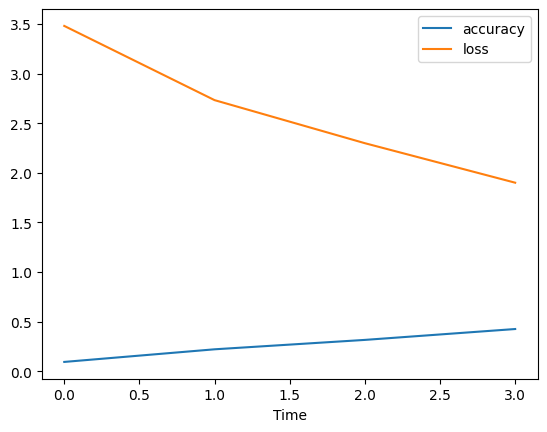

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('Time')
plt.legend(['accuracy', 'loss'])
plt.show()

In [20]:
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(224,224,3))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    pred = model.predict(images, batch_size=32)
    print("Actual: "+(image_path.split("/")[-1]).split("_")[0])
    print("Predicted: "+classes[np.argmax(pred)])

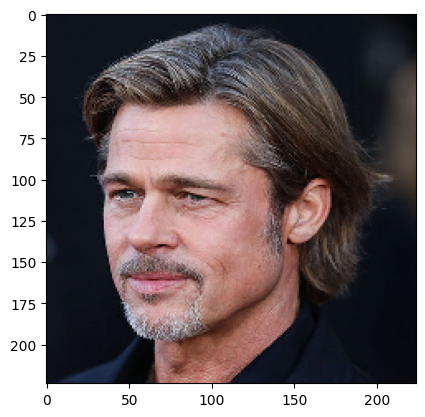

1/1 [==============================] - 0s 379ms/step
Actual: Brad Pitt
Predicted: Margot Robbie


In [22]:
predict_image("/home/meatisdelicious/DetectionVisage/DetectionVisage/FaceDetectionV4/input/face_recognition_dataset/Original_Images/Original_Images/Brad Pitt/Brad Pitt_102.jpg")